In [3]:
#import streamlit as st
import requests
import pandas as pd

In [4]:
def get_who_data(indicator_id):
    base_url = "https://ghoapi.azureedge.net/api/"
    url = f"{base_url}{indicator_id}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['value']  # Les données sont dans la clé 'value'
    else:
        st.error("Erreur lors de la récupération des données.")
        return None
    
def convert_to_dataframe(data):
    records = []
    for entry in data:
        record = {
                'Country': entry.get('SpatialDim', 'N/A'),
                'Year': entry.get('TimeDim', 'null'),
                'Value': entry.get('Value', 'N/A')
            }
        records.append(record)
    return pd.DataFrame(records)

data = get_who_data('WHOSIS_000001')
data = convert_to_dataframe(data)

In [5]:
data

,Country,Year,Value
0,DJI,2004,58.2 [57.1-59.3]
1,SOM,2008,48.0 [46.7-49.6]
2,BTN,2002,67.8 [67.1-68.6]
3,BHR,2011,75.2 [75.1-75.4]
4,SAU,2005,73.1 [72.8-73.5]
...,...,...,...
12931,UGA,2007,59.0 [58.1-60.0]
12932,DZA,2015,76.1 [75.8-76.4]
12933,CHN,2013,79.1 [78.8-79.5]
12934,GUY,2002,67.8 [67.4-68.3]


In [6]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Value']= data['Value'].astype(str).str[:4]
data['Value'] = data['Value'].replace('No d', 0).astype(float)
data

,Country,Year,Value
0,DJI,2004,58.2
1,SOM,2008,48.0
2,BTN,2002,67.8
3,BHR,2011,75.2
4,SAU,2005,73.1
...,...,...,...
12931,UGA,2007,59.0
12932,DZA,2015,76.1
12933,CHN,2013,79.1
12934,GUY,2002,67.8


In [7]:
data = data.groupby('Year').sum()
data

,Country,Value
Year,,
2000,SURGRCKGZBGDSAUERIKGZBWAPAKSOMVUTUGAKIRBHSPRIV...,39386.2
2001,FSMOMNESTESPWB_LIAMRGABJAMMNETJKGHAVUTTGOLBNAL...,39577.7
2002,BTNWB_HICMRMARLBNLBYPSELVAIRLAUTSYCCIVGNQLAOSW...,39714.6
2003,CYPBRAIRQNZLHRVLTUGNBARGZAFFSMPRYGEOBLRFINZMBT...,39875.7
2004,DJIWSMCYPIRLNICITAMNEDOMSAUIDNTGOMOZFRASOMMDAJ...,40073.1
2005,SAUGHAISLBWASWECHLHTIBFAROUMDVSENIRQAGOSEARJOR...,40283.1
2006,FJIAUSPRIVENCHLFINECUTJKNORMUSMWIARECZEBWAUSAS...,40546.6
2007,PHLKENSEARPERTKMSWZMMRWB_UMILVANGASVKKORSLBMRT...,40763.8
2008,SOMGRDLKAHTIUSAURYZMBGNQMDVBGDMUSSLBGUYUZBAGOE...,40963.7


In [8]:
data = data.reset_index()
data = data[['Year','Value']]
data

,Year,Value
0,2000,39386.2
1,2001,39577.7
2,2002,39714.6
3,2003,39875.7
4,2004,40073.1
5,2005,40283.1
6,2006,40546.6
7,2007,40763.8
8,2008,40963.7
9,2009,41195.3


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_model = LinearRegression()
linear_model.fit(data[['Year']], data['Value'])
score = linear_model.score(data[['Year']], data['Value'])
print(f'Coefficient : {linear_model.coef_}', f'Intercept : {linear_model.intercept_}', f'Score : {score}')
#lineat_model.intercept_
#lineat_model.score(data[['Year']], data['Value'])


Coefficient : [159.81789949] Intercept : -280053.41874647106 Score : 0.9254573432526474


In [10]:
predictions = linear_model.predict(np.array([[2020], [2021], [2022], [2023], [2024], [2025]]))
predictions
print(f'2020 : {predictions[0]}', f'2021 : {predictions[1]}', f'2022 : {predictions[2]}', f'2023 : {predictions[3]}', f'2024 : {predictions[4]}', f'2025 : {predictions[5]}')

2020 : 42778.73822699045 2021 : 42938.55612648226 2022 : 43098.37402597407 2023 : 43258.191925465886 2024 : 43418.0098249577 2025 : 43577.82772444951


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


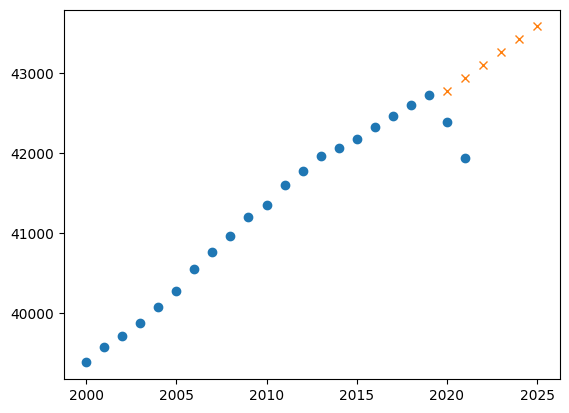

In [11]:
import matplotlib.pyplot as plt

plt.plot(data['Year'], data['Value'], 'o')
plt.plot([2020, 2021, 2022, 2023, 2024, 2025], predictions, 'x')


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


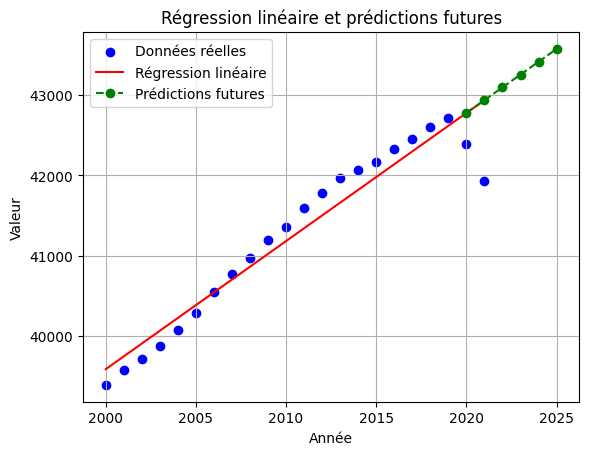

In [12]:
import matplotlib.pyplot as plt

# Plot des données réelles
plt.scatter(data['Year'], data['Value'], color='blue', label='Données réelles')

# Plot de la ligne de régression
plt.plot(data['Year'], linear_model.predict(data[['Year']]), color='red', label='Régression linéaire')

# Plot des prédictions futures
years_future = np.array([[2020], [2021], [2022], [2023], [2024], [2025]])
predictions = linear_model.predict(years_future)
plt.plot(years_future, predictions, color='green', linestyle='dashed', marker='o', label='Prédictions futures')

# Ajouter les étiquettes
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Régression linéaire et prédictions futures')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [13]:
import plotly.graph_objects as go
import numpy as np

# Préparation des prédictions
years_future = np.array([[2020], [2021], [2022], [2023], [2024], [2025]])
predictions = linear_model.predict(years_future)

# Création du graphique
fig = go.Figure()

# Ajout des données réelles
fig.add_trace(go.Scatter(x=data['Year'], y=data['Value'], mode='markers', name='Données réelles', marker=dict(color='blue')))

# Ajout de la ligne de régression
fig.add_trace(go.Scatter(x=data['Year'], y=linear_model.predict(data[['Year']]), mode='lines', name='Régression linéaire', line=dict(color='red')))

# Ajout des prédictions futures
fig.add_trace(go.Scatter(x=years_future.flatten(), y=predictions, mode='lines+markers', name='Prédictions futures', line=dict(dash='dash', color='green')))

# Mise en forme
fig.update_layout(
    title="Régression linéaire et prédictions futures",
    xaxis_title="Année",
    yaxis_title="Valeur",
    template="plotly_white"
)

# Afficher le graphique
fig.show()

/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
